In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv("train.csv")

df_y=df["SalePrice"]
df_y=pd.DataFrame(df_y)
df.drop(columns=["SalePrice","Id"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

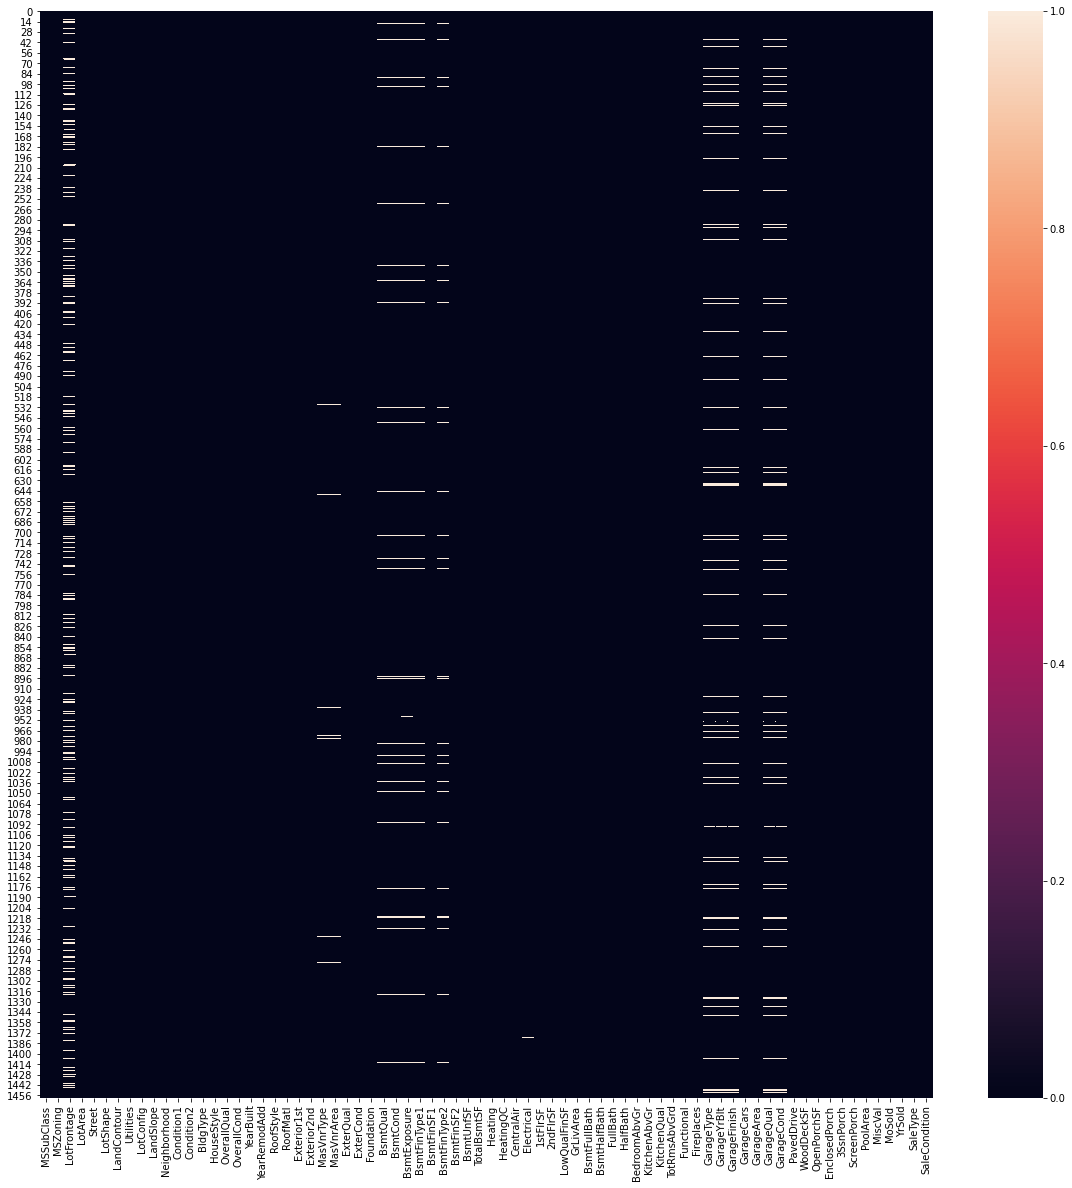

In [58]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
useles_col=df.isnull().sum()*100/df.shape[0]
useles_col=useles_col[useles_col>30].keys()
df.drop(columns=useles_col,inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

In [59]:
mis_col=df.isnull().sum()>0
mis_col=mis_col[mis_col==True].keys()
mis_df=df[mis_col]

mis_num=mis_df.select_dtypes(include=["int64","float64"])
mis_cat=mis_df.select_dtypes(include=["object"])


In [60]:
# from sklearn.impute import SimpleImputer
# imp=SimpleImputer(missing_values=np.NaN,strategy="median")

# miss = pd.DataFrame(imp.fit_transform(mis_num),columns=mis_num.keys())
# mis_num.update(miss)
# imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

# mis_cat.update(pd.DataFrame(imp.fit_transform(mis_cat),columns=mis_cat.keys()))
# sns.heatmap(mis_cat.isnull(),vmax=1,vmin=0)

In [61]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
imput = IterativeImputer(initial_strategy="median",max_iter=10,n_nearest_features=10,estimator=BayesianRidge(),missing_values=np.NaN,imputation_order="ascending")

int_col=df.select_dtypes(exclude="object").keys()

nu_df = pd.DataFrame(imput.fit_transform(df[int_col]),columns=int_col)
df.update(nu_df)

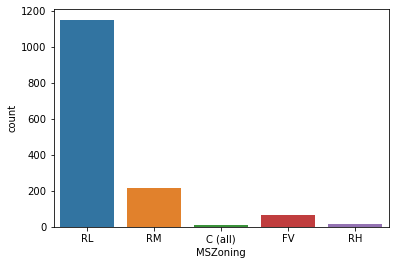

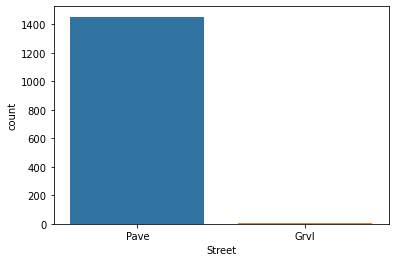

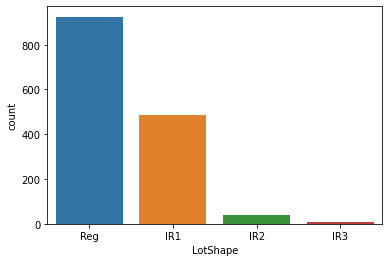

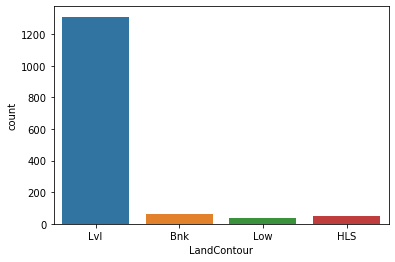

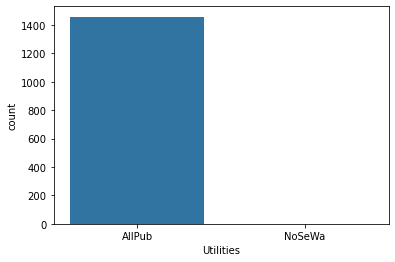

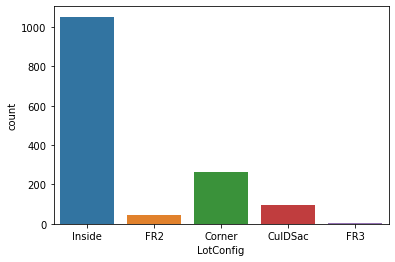

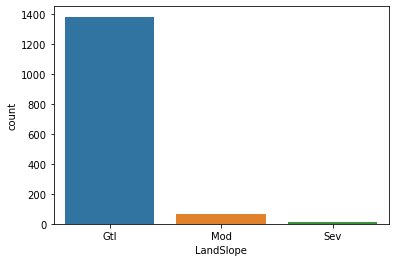

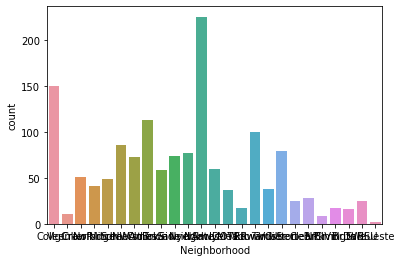

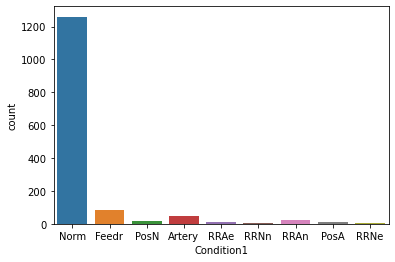

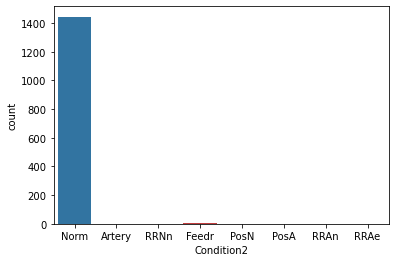

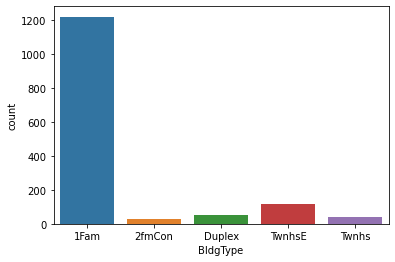

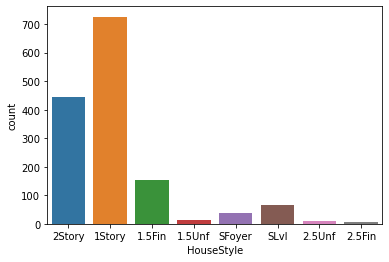

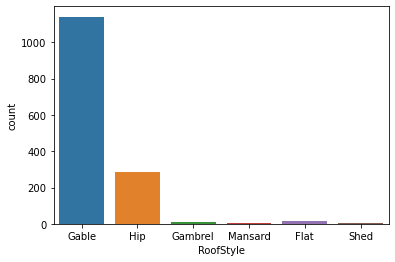

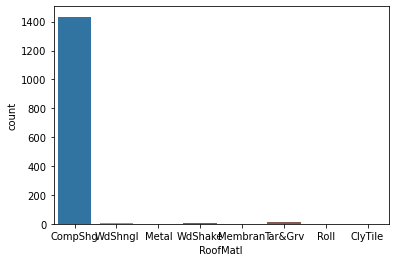

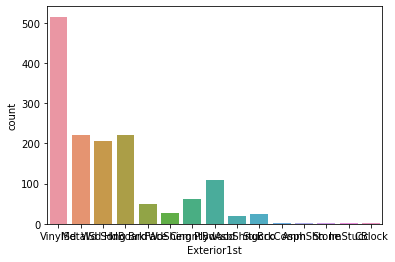

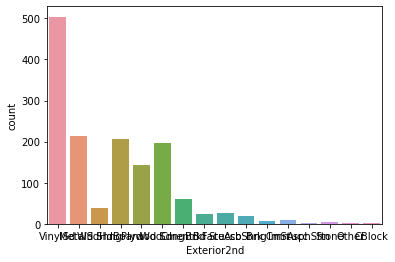

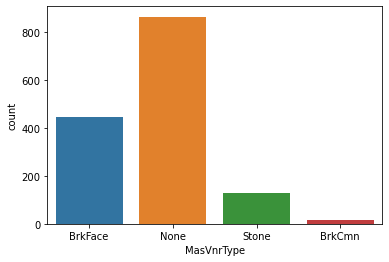

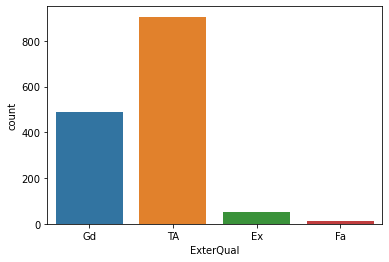

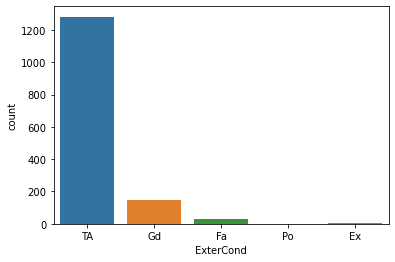

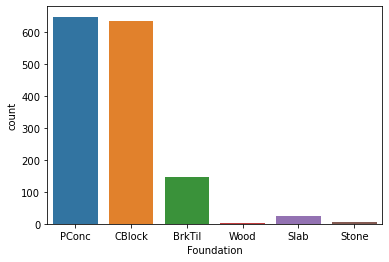

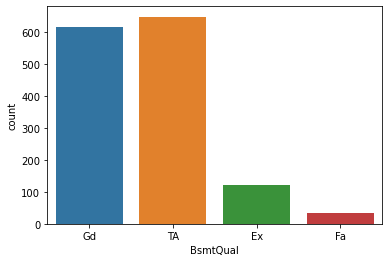

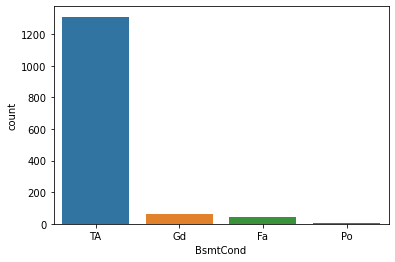

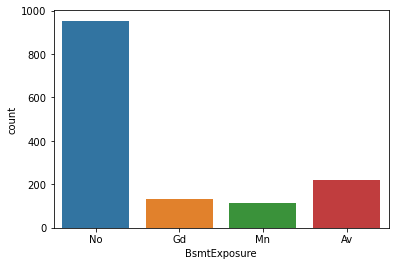

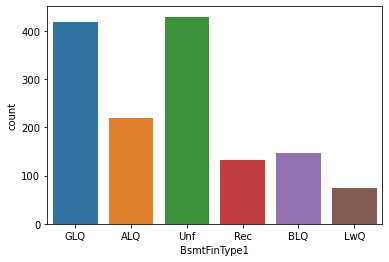

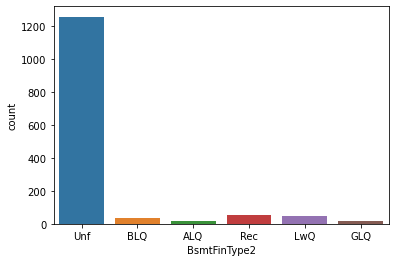

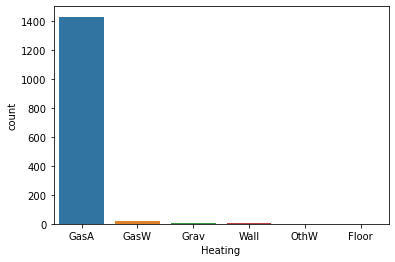

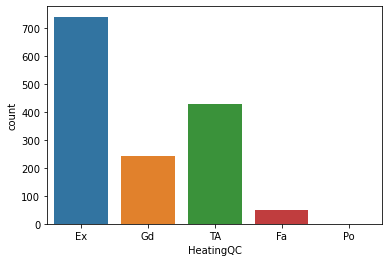

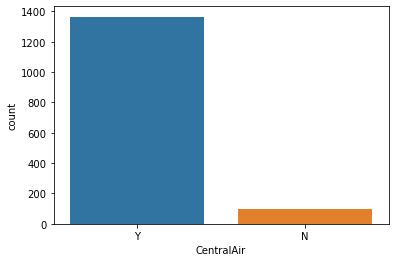

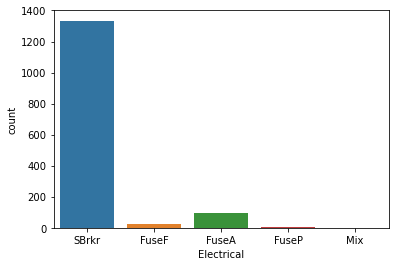

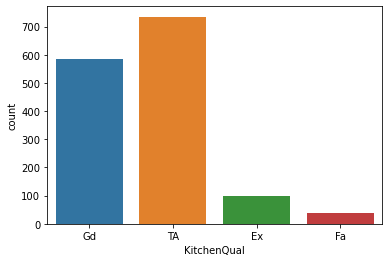

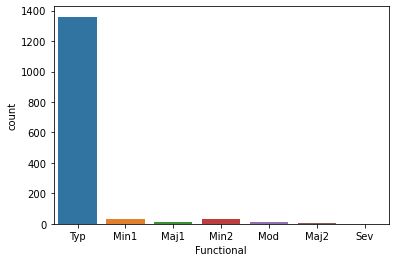

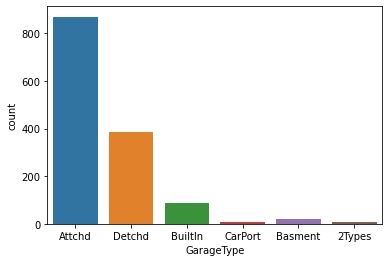

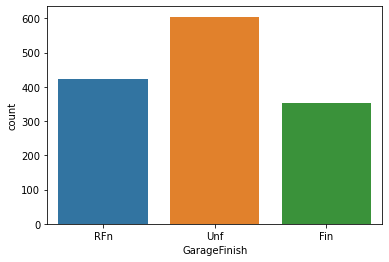

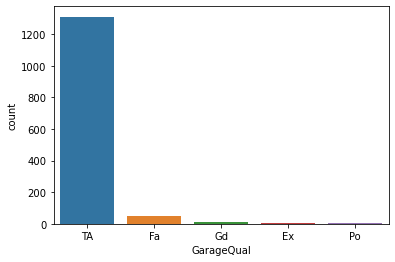

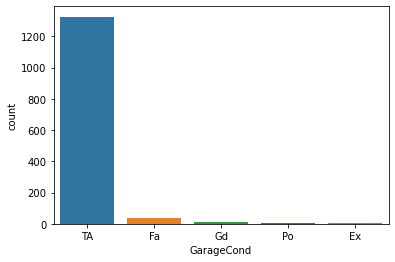

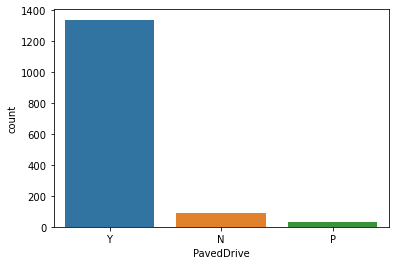

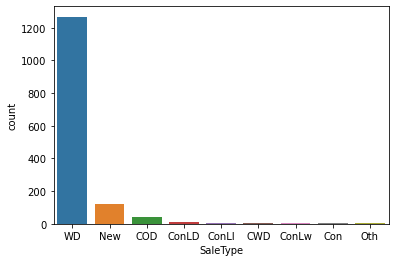

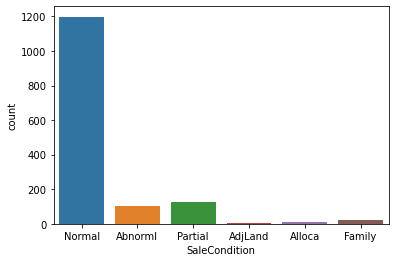

In [62]:
#droping useless columns as there is only one value which dominate the columns and no insights can be found from them
categor_col=df.select_dtypes(include=["object"]).keys()
df_cat=df[categor_col]
df_cat.columns
for i in df_cat.columns:
    sns.countplot(df[i])
    plt.show()

In [63]:
usles_col=[]
for j in df_cat.columns:
    for i in range(len(df_cat[j].value_counts())):
        if df_cat[j].value_counts()[i]>1000:
            usles_col.append(j)
usles_col
df_cat.drop(columns=usles_col,inplace=True)
df_cat.columns

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [64]:
#filling missing values of categorical variable
#step -1 (replacing na to none values becuase na in this case is not a missing values.b for more read document)

df_cat["GarageFinish"]=df_cat["GarageFinish"].fillna("none")
df_cat["GarageType"]=df_cat["GarageType"].fillna("None")
df_cat["MasVnrType"]=df_cat["MasVnrType"].fillna("None")
df_cat['BsmtQual']= df_cat['BsmtQual'].fillna('None')
df_cat['BsmtFinType1']= df_cat['BsmtFinType1'].fillna('None')
df_cat['BsmtExposure']= df_cat['BsmtExposure'].fillna('None')


In [65]:
#encoding ordinal features for training model (read document to find ordinal feature)
same_col=["ExterQual","BsmtQual","HeatingQC",'KitchenQual']
for i in same_col:
    df_cat[i]=df_cat[i].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
    
df_cat["BsmtQual"].fillna(0,inplace=True)

df_cat["GarageFinish"]=df_cat["GarageFinish"].map({"None":0,"Unf":1,"RFn":2,"Fin":3})
df_cat["GarageFinish"].fillna(0,inplace=True)

df_cat["BsmtFinType1"]=df_cat["BsmtFinType1"].map({"None":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

df_cat["BsmtExposure"]=df_cat["BsmtExposure"].map({"None":0,"No":1,"Mn":2,"Av":3,"Gd":4})

df_cat["HouseStyle"]=df_cat["HouseStyle"].map({'2Story':4, '1Story':1, '1.5Fin':3, '1.5Unf':2, 'SFoyer':7, 'SLvl':8, '2.5Unf':5,
       '2.5Fin':6})

df_cat["LotShape"]=df_cat["LotShape"].map({"IR3":1,"IR2":2,"IR1":3,"Reg":4})

In [66]:
df.drop(columns=usles_col,inplace=True)
df.update(df_cat)

In [67]:
to_intcol=["ExterQual","BsmtQual","HeatingQC",'KitchenQual','LotShape','HouseStyle','BsmtExposure','BsmtFinType1','GarageFinish','BsmtQual']
df[to_intcol]=df[to_intcol].astype("int64")

<AxesSubplot:>

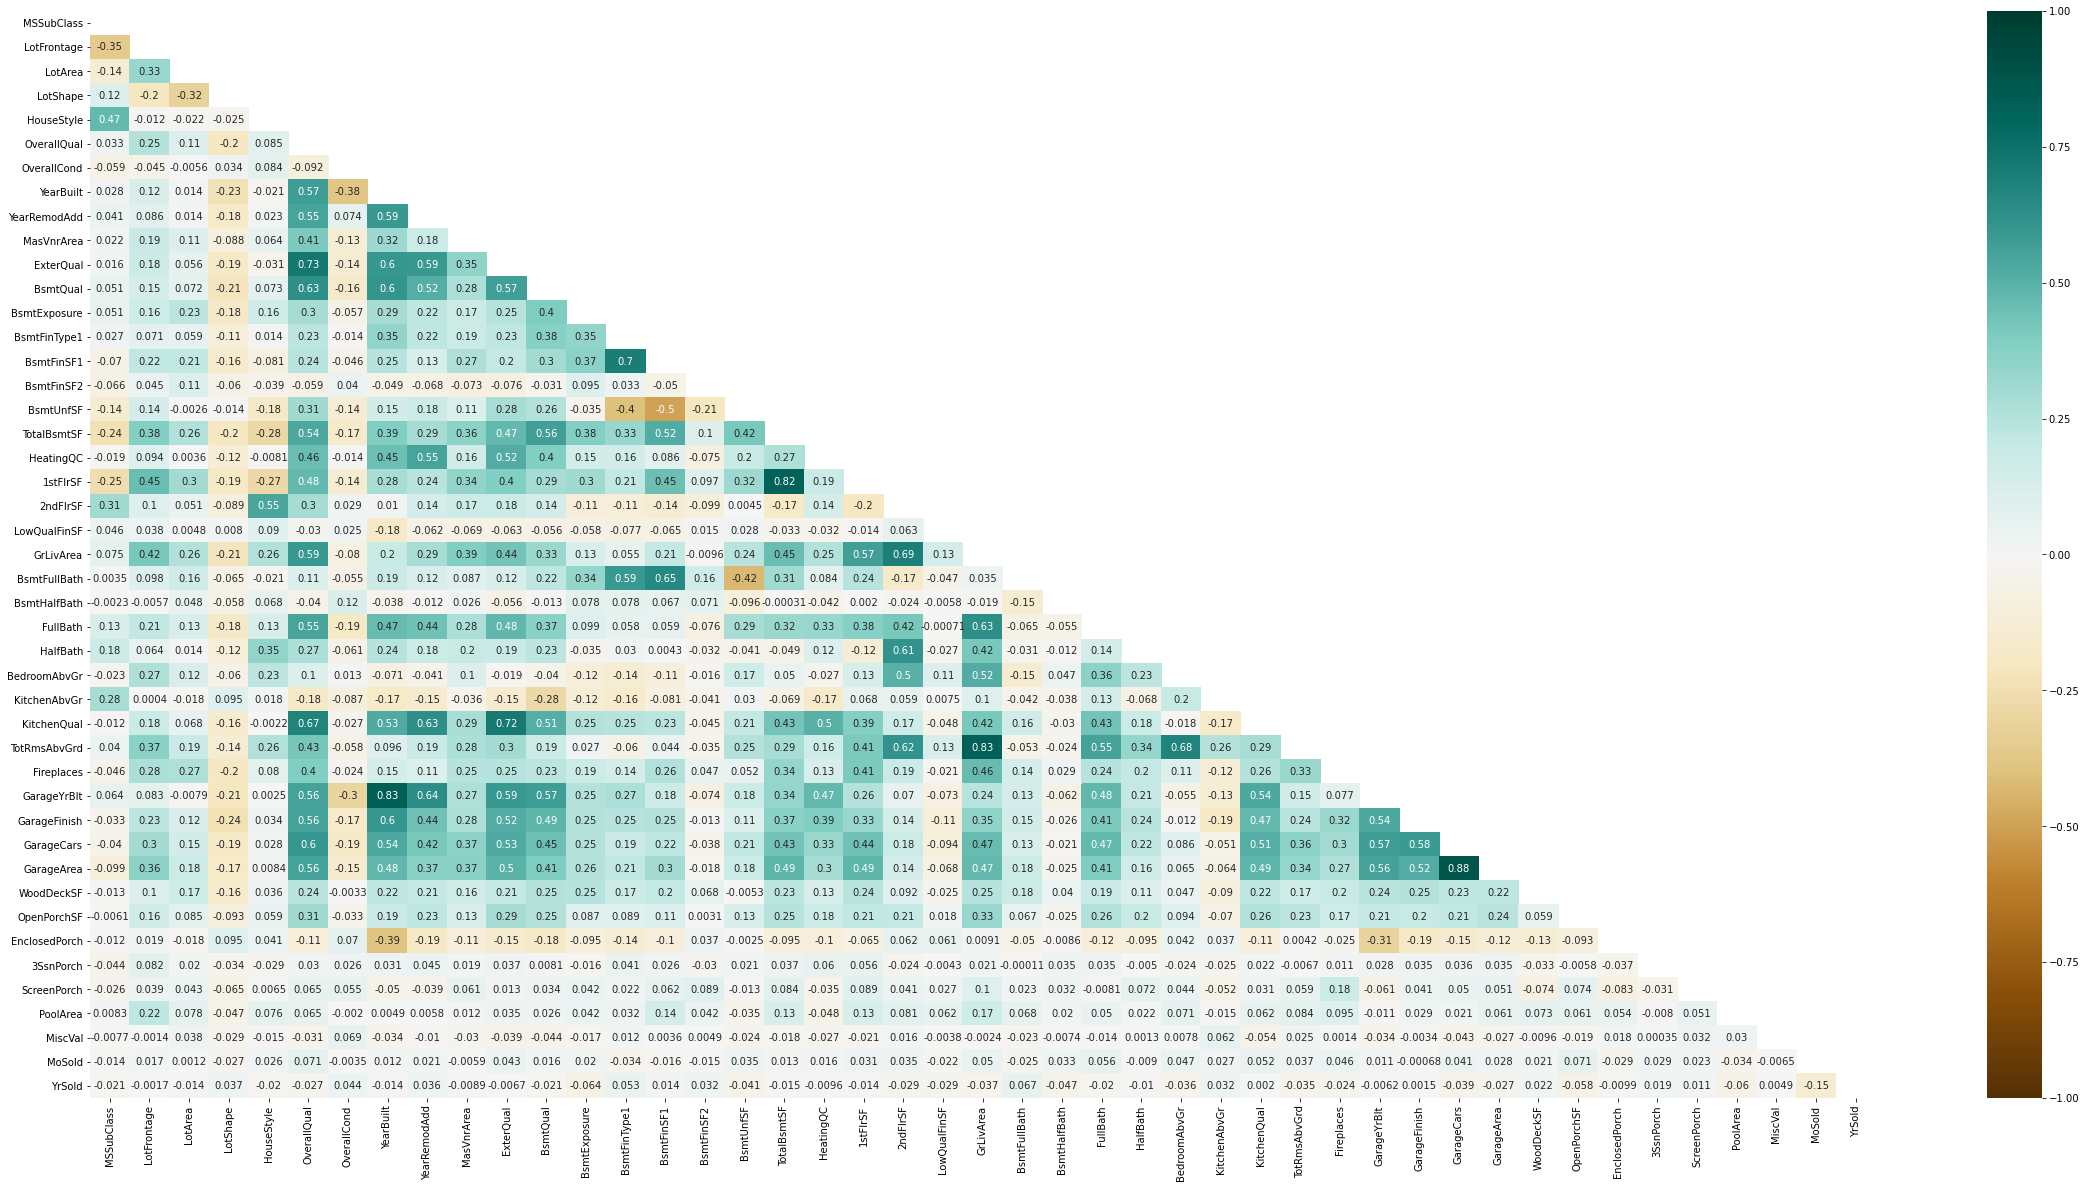

In [68]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),cmap="BrBG",annot=True,vmax=1,vmin=-1,mask=np.triu(df.corr()))

In [69]:
#removing correlated columns

def corcol(dataset,thresold):
    cor_col=set()
    cor_mat=dataset.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if(abs(cor_mat.iloc[i,j])>=thresold):
                cor_col.add(cor_mat.columns[i])
    return cor_col 

cor_col=corcol(df,0.7)
df.drop(columns=cor_col,inplace=True)

In [70]:
# miss_cat=df.select_dtypes(include=["object"]).keys()
# for i in miss_cat:
#     sns.boxplot(x=df[i],y=df_y)
#     plt.show()

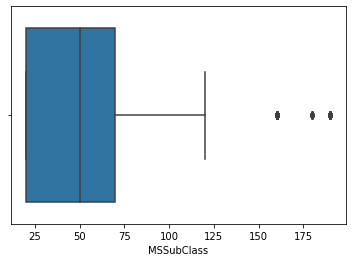

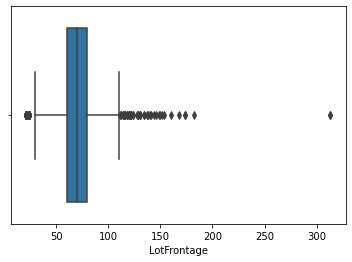

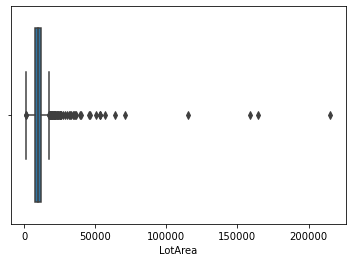

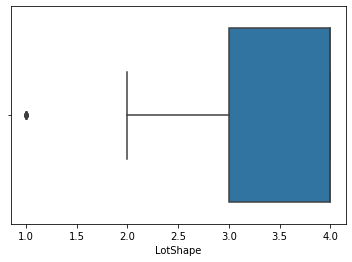

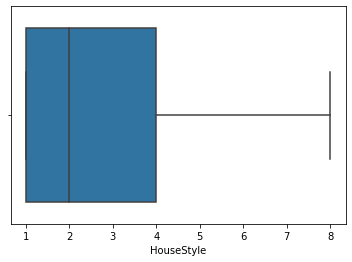

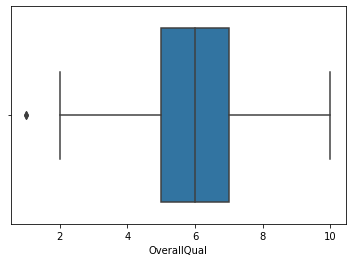

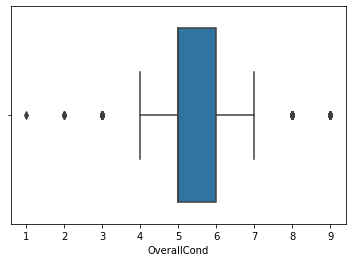

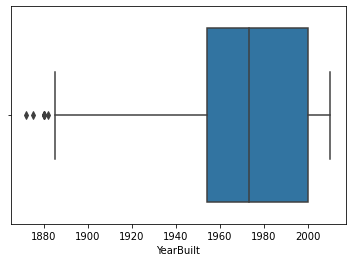

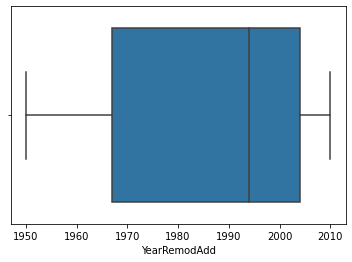

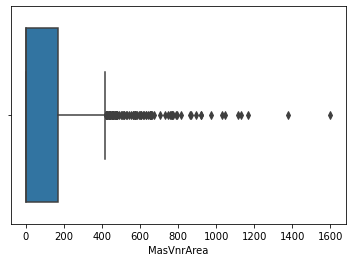

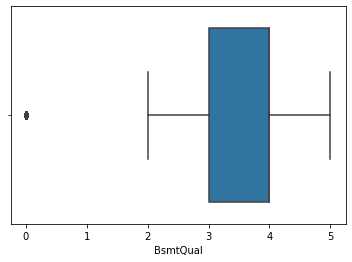

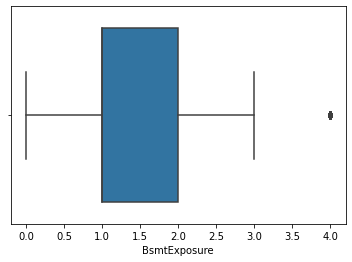

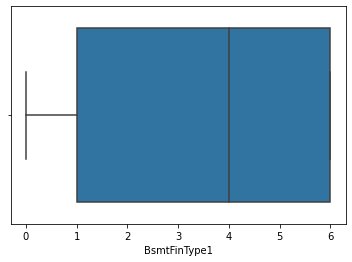

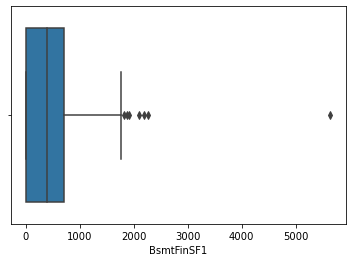

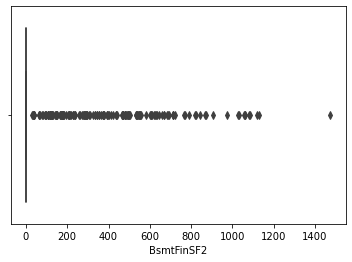

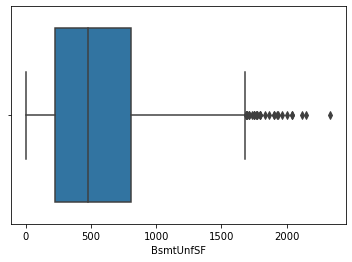

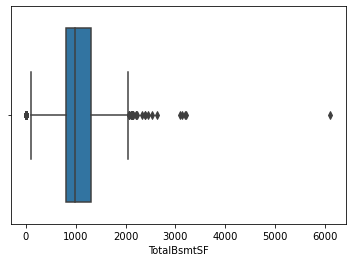

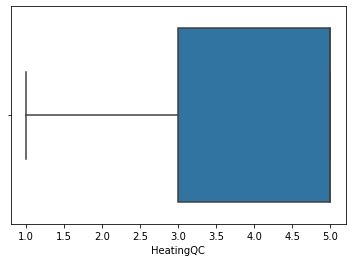

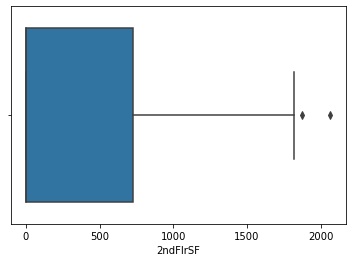

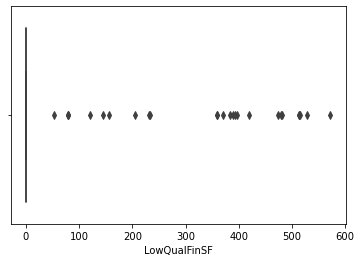

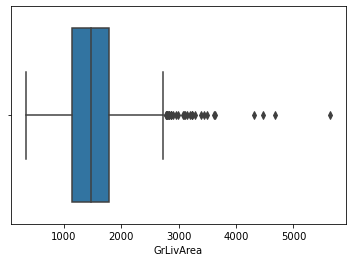

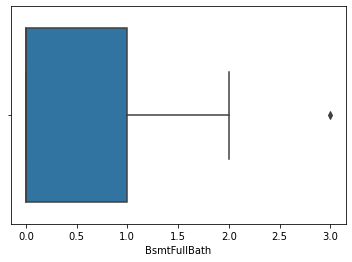

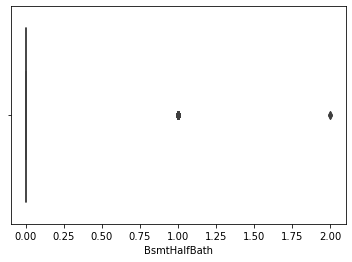

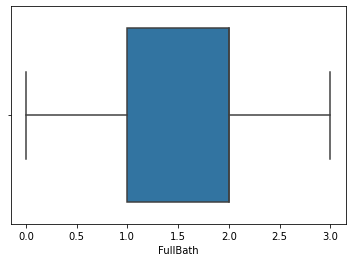

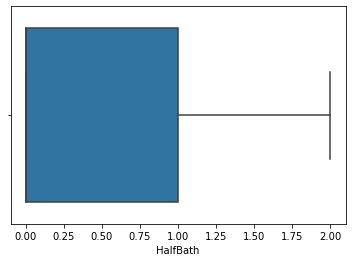

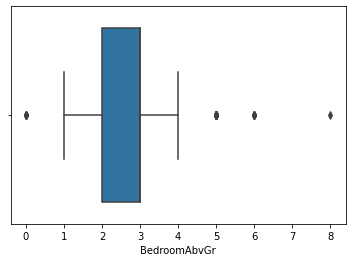

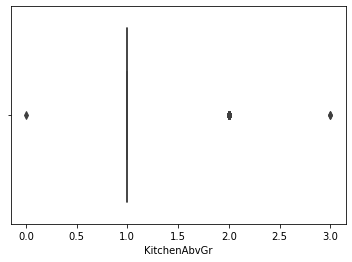

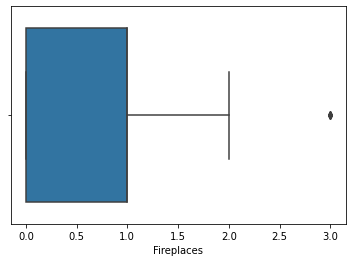

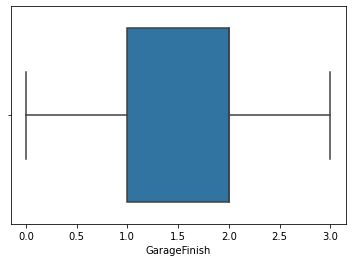

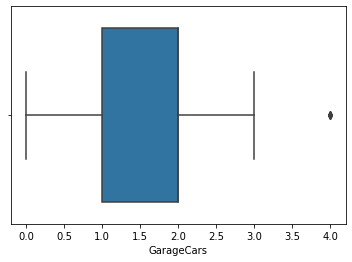

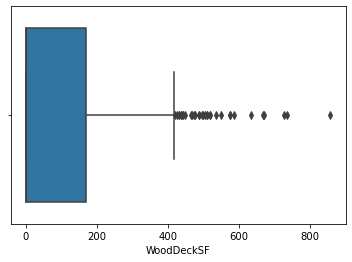

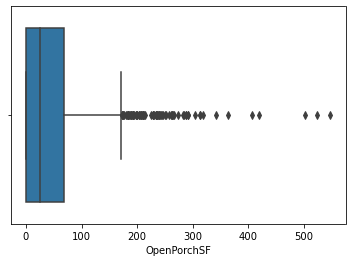

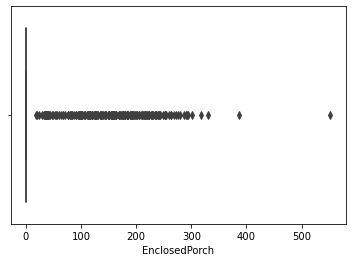

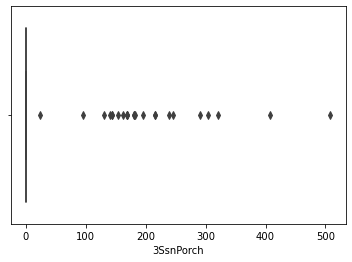

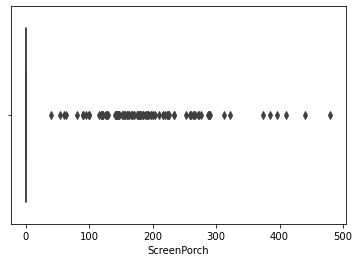

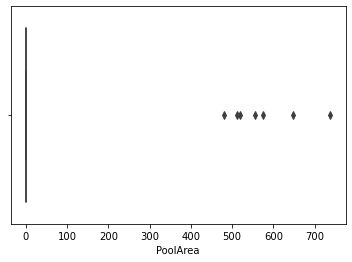

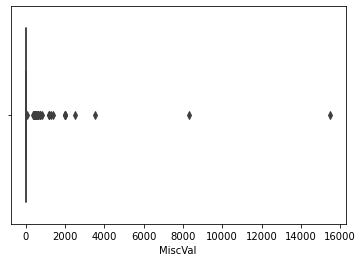

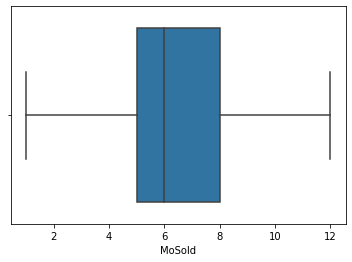

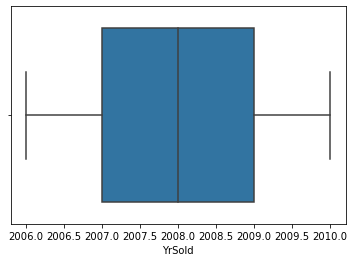

In [71]:
int_col=df.select_dtypes(exclude="O").keys()
for i in int_col:
    sns.boxplot(df[i],orient="h")
    plt.show()

In [72]:
outlier_col=['LotFrontage',"LotArea",'MasVnrArea',"BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","WoodDeckSF","OpenPorchSF","EnclosedPorch","MiscVal"]
for i in outlier_col:
    print(df[i].sort_values(ascending=False).head(10))

934     313.0
1298    313.0
1127    182.0
197     174.0
231     174.0
1107    168.0
1182    160.0
1337    153.0
1211    152.0
313     150.0
Name: LotFrontage, dtype: float64
313     215245.0
335     164660.0
249     159000.0
706     115149.0
451      70761.0
1298     63887.0
1396     57200.0
769      53504.0
457      53227.0
384      53107.0
Name: LotArea, dtype: float64
297     1600.0
1169    1378.0
691     1170.0
115     1129.0
70      1115.0
808     1047.0
58      1031.0
981      975.0
224      922.0
517      921.0
Name: MasVnrArea, dtype: float64
1298    5644.0
523     2260.0
898     2188.0
1182    2096.0
178     1904.0
70      1880.0
53      1810.0
440     1767.0
664     1721.0
654     1696.0
Name: BsmtFinSF1, dtype: float64
322     1474.0
542     1127.0
470     1120.0
854     1085.0
153     1080.0
271     1063.0
924     1061.0
764     1057.0
1253    1031.0
1458    1029.0
Name: BsmtFinSF2, dtype: float64
1298    6110.0
332     3206.0
496     3200.0
523     3138.0
440     3094.0
13

In [73]:
#removing outier columns
outlier_row=[934,1298,313,335,249,706,297,1169,332,53,197,346,230]
print(f"before :{len(df)}\n")
df.drop(outlier_row,inplace=True)
df_y.drop(outlier_row,inplace=True)
print(f"after: {len(df)}")

before :1460

after: 1447


In [74]:
df.set_index("LotFrontage",inplace=True)
df.reset_index(inplace=True)
df.tail()

,LotFrontage,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1442,62.0,60.0,7917.0,4,Gilbert,4,6.0,5.0,1999.0,2000.0,VinylSd,VinylSd,None,0.0,PConc,4,1,1,0.0,0.0,953.0,953.0,5,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,Attchd,2,2.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1443,85.0,20.0,13175.0,4,NWAmes,1,6.0,6.0,1978.0,1988.0,Plywood,Plywood,Stone,119.0,CBlock,4,1,5,790.0,163.0,589.0,1542.0,3,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,Attchd,1,2.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1444,66.0,70.0,9042.0,4,Crawfor,4,7.0,9.0,1941.0,2006.0,CemntBd,CmentBd,None,0.0,Stone,3,1,6,275.0,0.0,877.0,1152.0,5,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,2.0,Attchd,2,1.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1445,68.0,20.0,9717.0,4,NAmes,1,5.0,6.0,1950.0,1996.0,MetalSd,MetalSd,None,0.0,CBlock,3,2,6,49.0,1029.0,0.0,1078.0,4,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,Attchd,1,1.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0
1446,75.0,20.0,9937.0,4,Edwards,1,5.0,6.0,1965.0,1965.0,HdBoard,HdBoard,None,0.0,CBlock,3,1,4,830.0,290.0,136.0,1256.0,4,0.0,0.0,1256.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,Attchd,3,1.0,736.0,68.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0


In [75]:
df.reset_index()
df.tail()

,LotFrontage,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1442,62.0,60.0,7917.0,4,Gilbert,4,6.0,5.0,1999.0,2000.0,VinylSd,VinylSd,None,0.0,PConc,4,1,1,0.0,0.0,953.0,953.0,5,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,Attchd,2,2.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1443,85.0,20.0,13175.0,4,NWAmes,1,6.0,6.0,1978.0,1988.0,Plywood,Plywood,Stone,119.0,CBlock,4,1,5,790.0,163.0,589.0,1542.0,3,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,Attchd,1,2.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1444,66.0,70.0,9042.0,4,Crawfor,4,7.0,9.0,1941.0,2006.0,CemntBd,CmentBd,None,0.0,Stone,3,1,6,275.0,0.0,877.0,1152.0,5,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,2.0,Attchd,2,1.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1445,68.0,20.0,9717.0,4,NAmes,1,5.0,6.0,1950.0,1996.0,MetalSd,MetalSd,None,0.0,CBlock,3,2,6,49.0,1029.0,0.0,1078.0,4,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,Attchd,1,1.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0
1446,75.0,20.0,9937.0,4,Edwards,1,5.0,6.0,1965.0,1965.0,HdBoard,HdBoard,None,0.0,CBlock,3,1,4,830.0,290.0,136.0,1256.0,4,0.0,0.0,1256.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,Attchd,3,1.0,736.0,68.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0


In [76]:
nu_df=pd.read_csv("train.csv",usecols=to_intcol)
nu_df["salesprice"]=df_y

In [77]:
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1460 non-null   object 
 1   HouseStyle    1460 non-null   object 
 2   ExterQual     1460 non-null   object 
 3   BsmtQual      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   HeatingQC     1460 non-null   object 
 7   KitchenQual   1460 non-null   object 
 8   GarageFinish  1379 non-null   object 
 9   salesprice    1447 non-null   float64
dtypes: float64(1), object(9)
memory usage: 114.2+ KB


In [78]:
nu_df["GarageFinish"]=nu_df["GarageFinish"].fillna("none")
nu_df['BsmtQual']= nu_df['BsmtQual'].fillna('None')
nu_df['BsmtFinType1']= nu_df['BsmtFinType1'].fillna('None')
nu_df['BsmtExposure']= nu_df['BsmtExposure'].fillna('None')

In [79]:
# for col in nu_df.columns:
encode=nu_df.groupby("BsmtQual")["salesprice"].mean().sort_values().index
for i,k in enumerate(encode):
    print(f"{i}:{k}")

0:None
1:Fa
2:TA
3:Gd
4:Ex


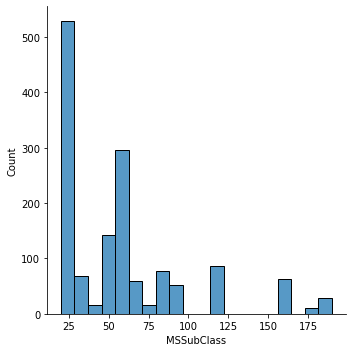

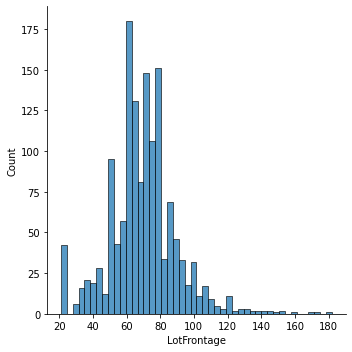

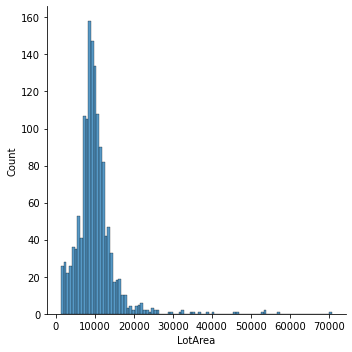

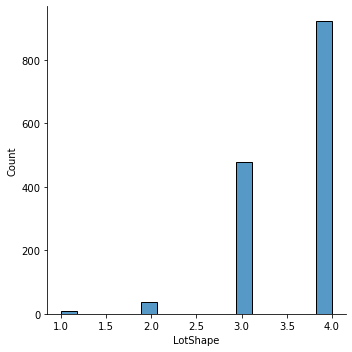

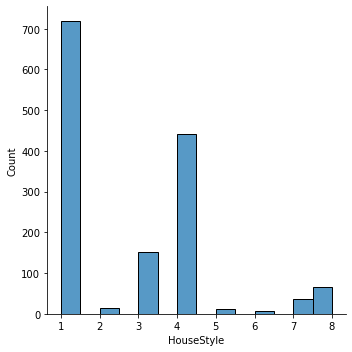

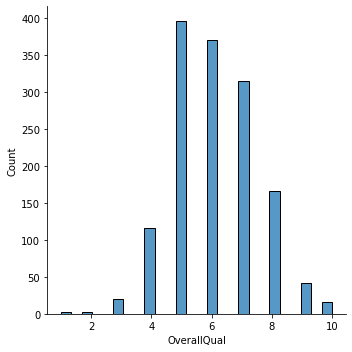

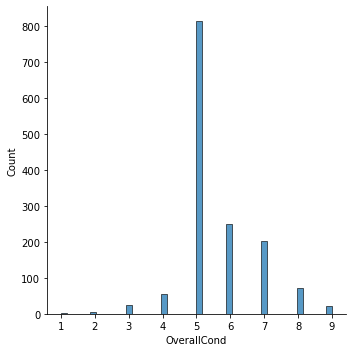

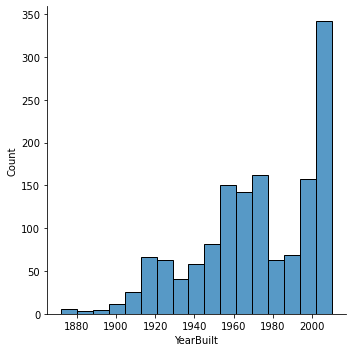

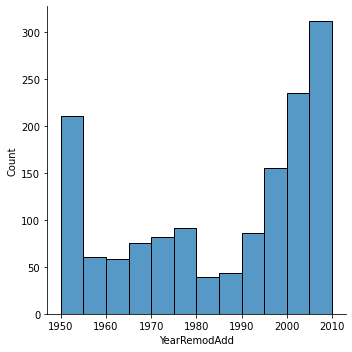

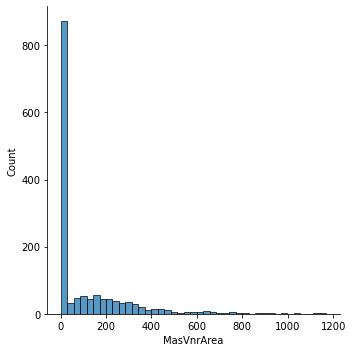

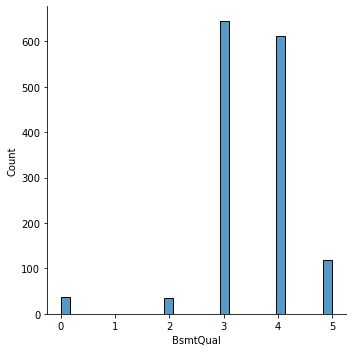

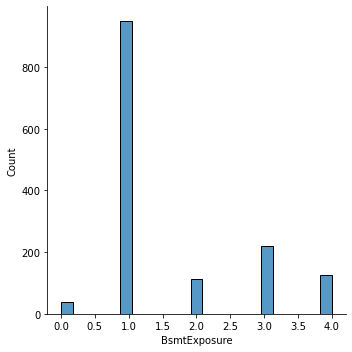

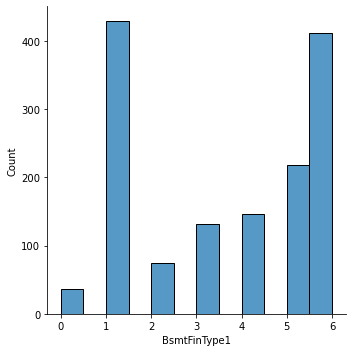

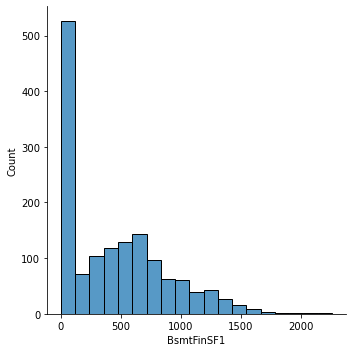

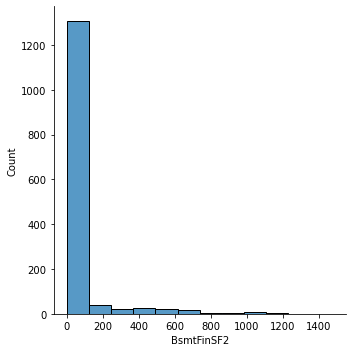

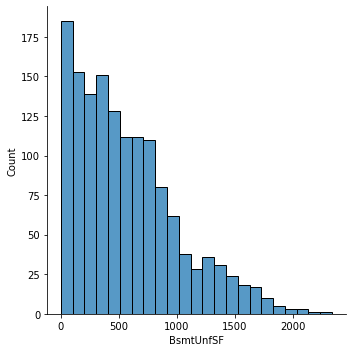

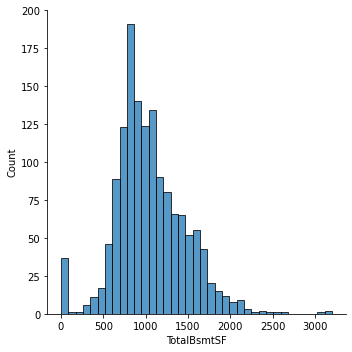

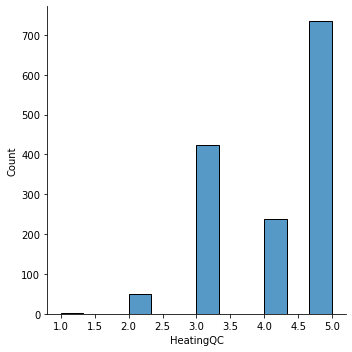

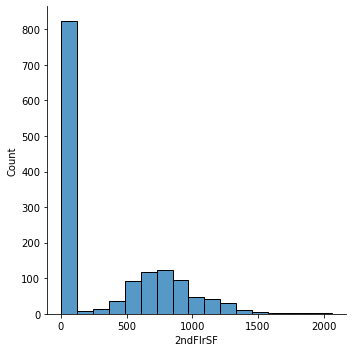

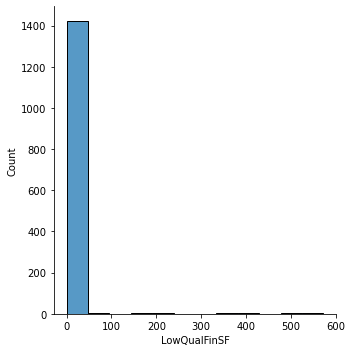

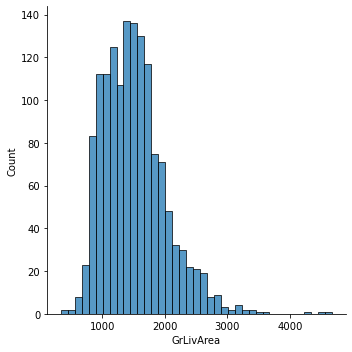

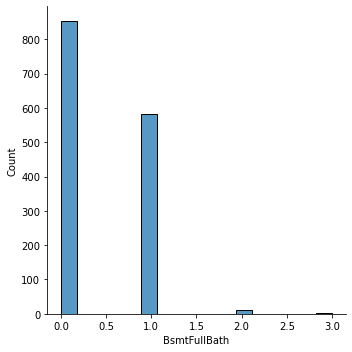

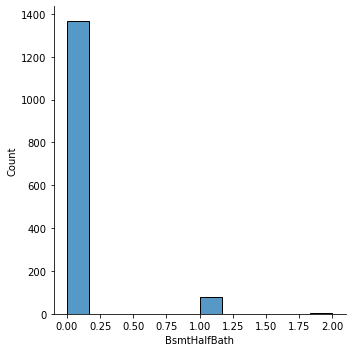

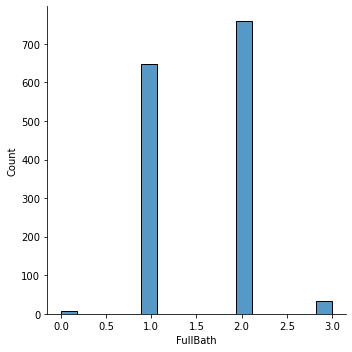

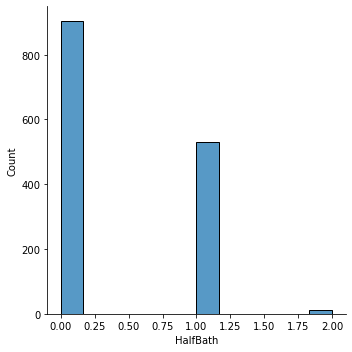

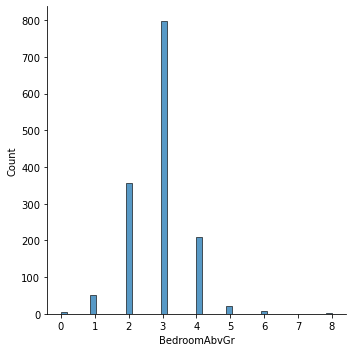

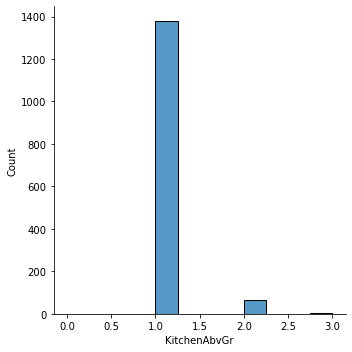

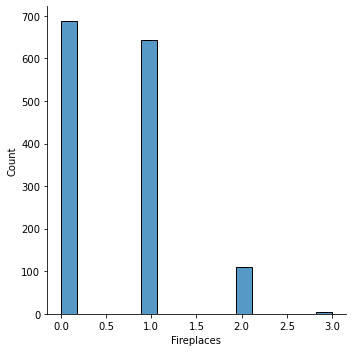

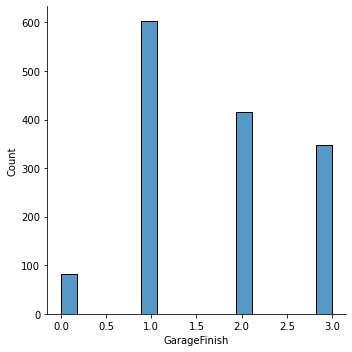

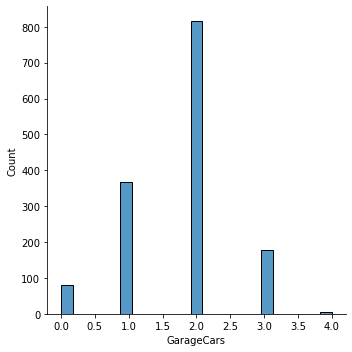

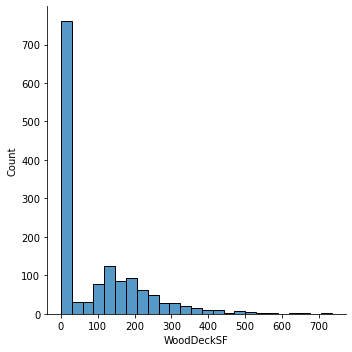

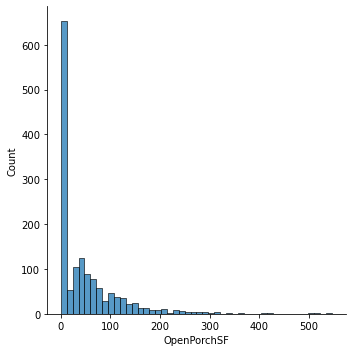

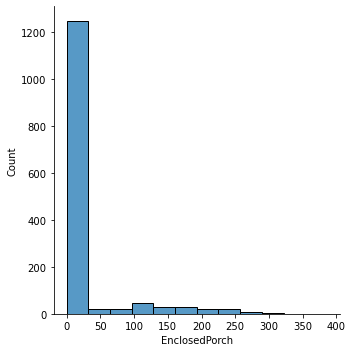

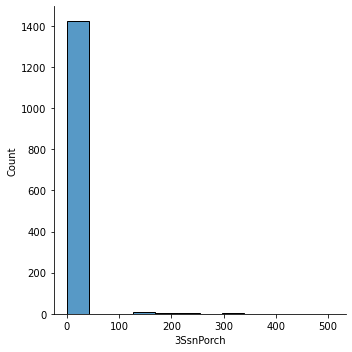

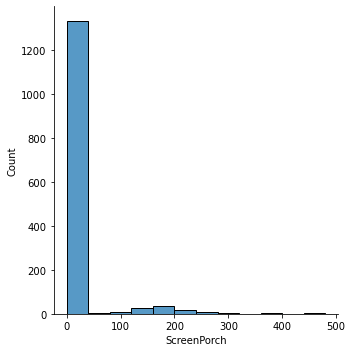

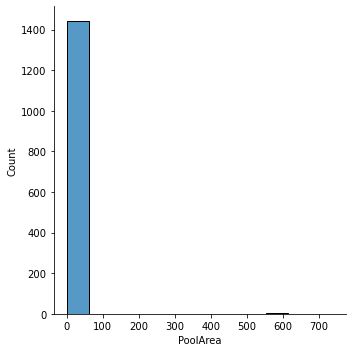

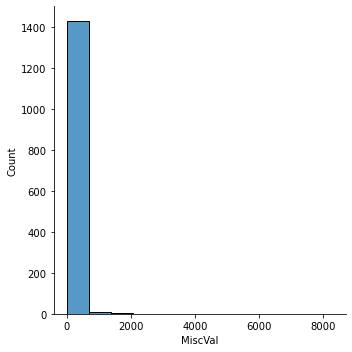

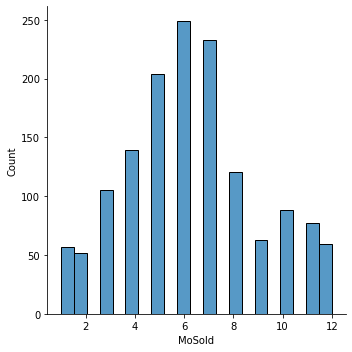

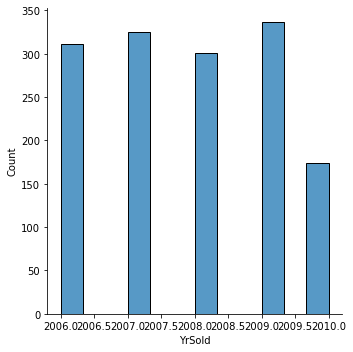

In [80]:
train=df
for i in int_col:
    sns.displot(train[i])
    plt.show()
col_to_drop=["LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]
col_to_normal=["LotFrontage","LotArea","TotalBsmtSF","MoSold"]
col_to_stand=["YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtUnfSF","2ndFlrSF","GrLivArea","WoodDeckSF","OpenPorchSF"]

In [81]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
norm=MinMaxScaler()
scaler=StandardScaler()

train[col_to_normal]=pd.DataFrame(scaler.fit_transform(train[col_to_normal]),columns=col_to_normal)
train[col_to_stand]=pd.DataFrame(norm.fit_transform(train[col_to_stand]),columns=col_to_stand)
df_y=np.log(df_y)
train.drop(columns=col_to_drop,inplace=True)

In [82]:
from sklearn.model_selection import train_test_split
train.dropna(inplace=True)
train=pd.get_dummies(train)
df_y.dropna(inplace=True)

x_train,x_test,y_train,y_test=train_test_split(train,df_y,test_size=0.3,random_state=42)

In [96]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as mae
alphas=np.logspace(-0.3,0.9,150)
best_alpha=0
max_score=0
scores=np.empty_like(alphas)
for i,a in enumerate(alphas):
    ridge=Ridge()
    ridge.set_params(alpha=a)
    ridge.fit(x_train,y_train)
#     scores.append(mae(y_test,ridge.predict(x_test)))
    scores[i]=ridge.score(x_test,y_test)
    if scores[i]>max_score:
        max_score=scores[i]
        best_alpha=a
        redge_save=ridge

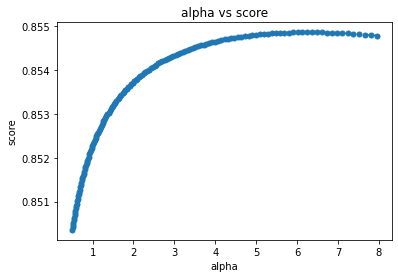

best alpha is 6.241687387788303 and score is 0.8548569592624514


In [97]:
plt.plot(alphas,scores,markersize=5,linestyle="dashed",marker="o")
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("alpha vs score")
plt.show()
print(f"best alpha is {best_alpha} and score is {max_score}")